In [2]:
import numpy as np
from itertools import combinations
import random

# Constants for the 3D simulation
BOX_WIDTH = 50
BOX_HEIGHT = 50
BOX_LENGTH = 50
PARTICLE_RADII = {'A': 3, 'B': 3, 'C': 3}  # Adjusted for species-specific radii
INITIAL_SPEEDS = {'A': 4, 'B': 4, 'C': 4}  # Adjusted for species-specific speeds
SIMULATION_SETS = 100  # Number of simulations per particle number set
MAX_PARTICLES = 4  # Maximum number of each particle in the system

# Particle class adjusted for 3D
class Particle:
    def __init__(self, species, x, y, z, vx, vy, vz):
        self.species = species
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.radius = PARTICLE_RADII[species]

# Functions update_positions and handle_collisions remain unchanged
# Function to update positions in 3D
def update_positions(particles):
    for particle in particles:
        particle.x += particle.vx
        particle.y += particle.vy
        particle.z += particle.vz
        # Handle wall collisions in 3D
        if particle.x > BOX_WIDTH - particle.radius or particle.x < particle.radius:
            particle.vx *= -1
        if particle.y > BOX_HEIGHT - particle.radius or particle.y < particle.radius:
            particle.vy *= -1
        if particle.z > BOX_LENGTH - particle.radius or particle.z < particle.radius:
            particle.vz *= -1

# Function to handle collisions and species change in 3D
def handle_collisions(particles):
    for p1, p2 in combinations(particles, 2):
        dx = p1.x - p2.x
        dy = p1.y - p2.y
        dz = p1.z - p2.z
        distance = np.sqrt(dx**2 + dy**2 + dz**2)
        if distance < p1.radius + p2.radius:
            # Change species and radius upon collision
            if {p1.species, p2.species} == {'A', 'B'}:
                new_species = 'C'
            elif {p1.species, p2.species} == {'A', 'C'}:
                new_species = 'B'
            elif {p1.species, p2.species} == {'B', 'C'}:
                new_species = 'A'
            else:
                continue  # No species change for collisions between same species
            p1.species, p2.species = new_species, new_species
            p1.radius, p2.radius = PARTICLE_RADII[new_species], PARTICLE_RADII[new_species]


# Function to run a single 3D simulation
def run_simulation(num_particles):
    particles = []
    for species in ['A', 'B', 'C']:
        for _ in range(num_particles):
            angle_theta = random.uniform(0, 2 * np.pi)
            angle_phi = random.uniform(0, np.pi)
            speed = INITIAL_SPEEDS[species]
            vx = speed * np.sin(angle_phi) * np.cos(angle_theta)
            vy = speed * np.sin(angle_phi) * np.sin(angle_theta)
            vz = speed * np.cos(angle_phi)
            particles.append(Particle(species,
                                      random.uniform(PARTICLE_RADII[species], BOX_WIDTH - PARTICLE_RADII[species]),
                                      random.uniform(PARTICLE_RADII[species], BOX_HEIGHT - PARTICLE_RADII[species]),
                                      random.uniform(PARTICLE_RADII[species], BOX_LENGTH - PARTICLE_RADII[species]),
                                      vx, vy, vz))
    step = 0
    while True:  # No step limit
        update_positions(particles)
        handle_collisions(particles)
        remaining_species = set(particle.species for particle in particles)
        if len(remaining_species) == 1:
            break
        step += 1
    return remaining_species, step

for num_particles in range(1, MAX_PARTICLES + 1):
    print(f"Running simulations with {num_particles} of each particle type.")
    steps_recorded = []
    for set_num in range(SIMULATION_SETS):
        outcome, steps = run_simulation(num_particles)
        print(f"Set {set_num + 1}: Remaining species {outcome}, steps taken {steps}.")
        steps_recorded.append(steps)
    print(f"Average steps for {num_particles} particles: {np.mean(steps_recorded):.2f}")
    # Increase the number of each type of particle for the next round of simulations, up to a maximum
    NUM_PARTICLES = min(num_particles + 1, MAX_PARTICLES)

Running simulations with 1 of each particle type.
Set 1: Remaining species {'C'}, steps taken 17.
Set 2: Remaining species {'C'}, steps taken 48.
Set 3: Remaining species {'C'}, steps taken 84.
Set 4: Remaining species {'A'}, steps taken 20.
Set 5: Remaining species {'A'}, steps taken 131.
Average steps for 1 particles: 60.00
Running simulations with 2 of each particle type.
Set 1: Remaining species {'A'}, steps taken 370.
Set 2: Remaining species {'A'}, steps taken 10.
Set 3: Remaining species {'B'}, steps taken 903.
Set 4: Remaining species {'B'}, steps taken 1899.
Set 5: Remaining species {'C'}, steps taken 702.
Average steps for 2 particles: 776.80
Running simulations with 3 of each particle type.
Set 1: Remaining species {'B'}, steps taken 1328.
Set 2: Remaining species {'B'}, steps taken 9075.
Set 3: Remaining species {'B'}, steps taken 767.
Set 4: Remaining species {'B'}, steps taken 3092.
Set 5: Remaining species {'B'}, steps taken 2381.
Average steps for 3 particles: 3328.60
R

Traceback (most recent call last):
  File "C:\Users\James\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\James\AppData\Local\Temp\ipykernel_27240\3204270572.py", line 92, in <module>
    outcome, steps = run_simulation(num_particles)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\James\AppData\Local\Temp\ipykernel_27240\3204270572.py", line 81, in run_simulation
    handle_collisions(particles)
  File "C:\Users\James\AppData\Local\Temp\ipykernel_27240\3204270572.py", line -1, in handle_collisions
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\James\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 2120, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\James\anaco

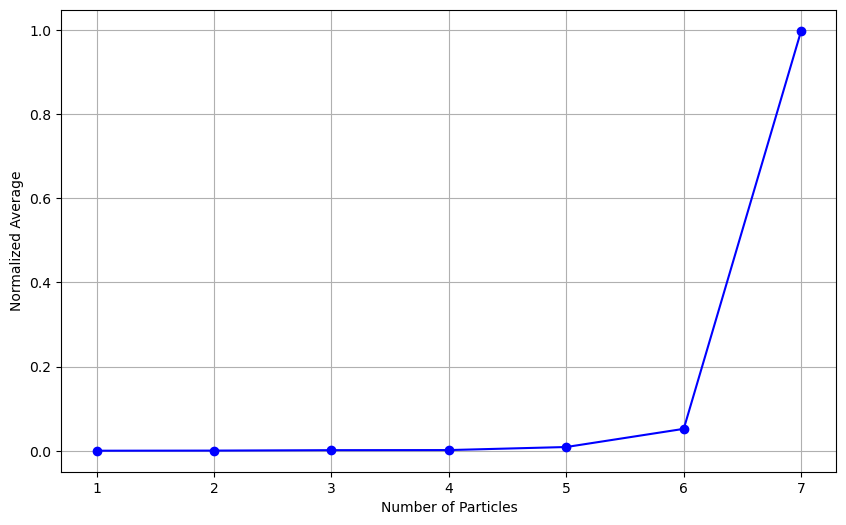

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Extracted averages from each simulation
averages = np.array([60.00, 776.80, 3328.60, 3939.40, 22170.80, 130529.40, 2505070])

# Normalize the averages
normalized_averages = averages / np.linalg.norm(averages)

# Number of particles for the x-axis
particles = np.arange(1, 8)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(particles, normalized_averages, marker='o', linestyle='-', color='b')
plt.xlabel('Number of each subatomic particle')
plt.ylabel('Normalized Average')
plt.xticks(particles)
plt.grid(True)
plt.savefig('plot.png')
plt.show()

